# 1. Baixando os data-sets do Kaggle:

Nesta etapa, os conjuntos de dados utilizados no projeto foram obtidos a partir da plataforma Kaggle. Os dados foram selecionados com base na aderência ao problema proposto e no potencial analítico para exploração, modelagem e geração de insights. O processo incluiu a autenticação na plataforma, o download dos arquivos e a organização inicial dos dados para as etapas posteriores de análise.




In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"educoqueiro11","key":"2f782b6c67c74587e2a6c8f497a79c4e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir -p data/no_price
!mkdir -p data/with_price

In [5]:
!kaggle datasets download -d shinomikel/stardew-valley-spring-crop-info -p data/no_price --unzip

Dataset URL: https://www.kaggle.com/datasets/shinomikel/stardew-valley-spring-crop-info
License(s): CC0-1.0
  0% 0.00/2.97k [00:00<?, ?B/s]
100% 2.97k/2.97k [00:00<00:00, 16.3MB/s]


In [6]:
!kaggle datasets download -d juletopi/stardew-valley-crops-updated -p data/with_price --unzip

Dataset URL: https://www.kaggle.com/datasets/juletopi/stardew-valley-crops-updated
License(s): MIT
  0% 0.00/3.94k [00:00<?, ?B/s]
100% 3.94k/3.94k [00:00<00:00, 17.1MB/s]


In [7]:
!ls data/no_price
!ls data/with_price

fall_crop_info.csv     summer_crops_info.csv
spring_crops_info.csv  winter_crop_info.csv
fall_crops_info.csv	spring_crops_info.csv  winter_crops_info.csv
special_crops_info.csv	summer_crops_info.csv


#2. Realização de Análise Exploratória de Dados (EDA):

Nesta etapa, foi realizada a Análise Exploratória de Dados (EDA) com o objetivo de compreender a estrutura dos datasets, identificar os tipos de variáveis disponíveis e verificar a presença de valores ausentes ou inconsistências. Essa análise inicial permitiu validar a qualidade dos dados e garantir que as informações são adequadas para as etapas posteriores de modelagem e simulação de estratégias de plantio.

In [8]:
# importando as bibliotecas que vamos usar em todo o projeto:

# Bibliotecas básicas
import pandas as pd
import numpy as np


# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e apoio analítico
from scipy import stats


# Pré-processamento e métricas
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Configurações gerais
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [9]:
# Carregando os data-sets

# Dataset sem informações detalhadas de preço
spring_no_price = pd.read_csv("/content/data/no_price/spring_crops_info.csv")
summer_no_price = pd.read_csv("/content/data/no_price/summer_crops_info.csv")
fall_no_price   = pd.read_csv("/content/data/no_price/fall_crop_info.csv")
winter_no_price = pd.read_csv("/content/data/no_price/winter_crop_info.csv")

# Dataset com informações de preço e custo
spring_price = pd.read_csv("/content/data/with_price/spring_crops_info.csv")
summer_price = pd.read_csv("/content/data/with_price/summer_crops_info.csv")
fall_price   = pd.read_csv("/content/data/with_price/fall_crops_info.csv")
winter_price = pd.read_csv("/content/data/with_price/winter_crops_info.csv")
special_price = pd.read_csv("/content/data/with_price/special_crops_info.csv")


In [10]:
# Verrificando um dataset específico:

spring_price.head()

,crop_name,description,days_to_grow,regrowth,seed_price,sell_price,multiple_harvests,edible,season
0,Blue Jazz,The flower grows in a sphere to invite as many...,7,0,30,50,NO,NO,Spring
1,Carrot,"A fast-growing, colorful tuber that makes for ...",3,0,35,35,NO,YES,Spring
2,Cauliflower,"Valuable, but slow-growing. Despite its pale c...",12,0,80,175,NO,YES,Spring
3,Coffee Bean,Plant in spring or summer to grow a coffee pla...,10,2,100,15,YES,NO,Spring
4,Garlic,Adds a wonderful zestiness to dishes. High qua...,4,0,40,60,NO,YES,Spring


In [11]:
spring_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   crop_name          14 non-null     object
 1   description        14 non-null     object
 2   days_to_grow       14 non-null     int64 
 3   regrowth           14 non-null     int64 
 4   seed_price         14 non-null     int64 
 5   sell_price         14 non-null     int64 
 6   multiple_harvests  14 non-null     object
 7   edible             14 non-null     object
 8   season             14 non-null     object
dtypes: int64(4), object(5)
memory usage: 1.1+ KB


In [12]:
spring_price.shape

(14, 9)

In [13]:
spring_price.dtypes

,0
crop_name,object
description,object
days_to_grow,int64
regrowth,int64
seed_price,int64
sell_price,int64
multiple_harvests,object
edible,object
season,object


In [14]:
# Verificando todos quanto a valores nulos e registros duplicados

datasets = {
    "spring_no_price": spring_no_price,
    "summer_no_price": summer_no_price,
    "fall_no_price": fall_no_price,
    "winter_no_price": winter_no_price,
    "spring_price": spring_price,
    "summer_price": summer_price,
    "fall_price": fall_price,
    "winter_price": winter_price,
    "special_price": special_price
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print("Valores nulos por coluna:")
    print(df.isnull().sum())
    print(f"Registros duplicados: {df.duplicated().sum()}")
    print("-" * 50)


Dataset: spring_no_price
Valores nulos por coluna:
crop_name            0
description          0
days_to_grow         0
multiple_harvests    0
season               0
dtype: int64
Registros duplicados: 0
--------------------------------------------------
Dataset: summer_no_price
Valores nulos por coluna:
crop_name            0
description          0
days_to_grow         0
multiple_harvests    0
season               0
dtype: int64
Registros duplicados: 0
--------------------------------------------------
Dataset: fall_no_price
Valores nulos por coluna:
crop_name            0
description          0
days_to_grow         0
multiple_harvests    0
season               0
dtype: int64
Registros duplicados: 0
--------------------------------------------------
Dataset: winter_no_price
Valores nulos por coluna:
crop_name            0
description          0
days_to_grow         0
multiple_harvests    0
season               0
dtype: int64
Registros duplicados: 0
-------------------------------------

In [15]:
spring_price[["days_to_grow", "seed_price", "sell_price"]].describe()

,days_to_grow,seed_price,sell_price
count,14.00,14.00,14.00
mean,7.36,56.07,73.57
std,3.00,29.23,61.53
min,3.00,20.00,15.00
25%,6.00,36.25,31.25
50%,6.50,45.00,45.00
75%,9.50,77.50,102.50
max,13.00,100.00,220.00


Estatísticas descritivas das variáveis numéricas do dataset de primavera (spring_price), incluindo tempo de crescimento, custo das sementes e preço de venda das culturas.

In [16]:
spring_price[spring_price["sell_price"] < spring_price["seed_price"]]


,crop_name,description,days_to_grow,regrowth,seed_price,sell_price,multiple_harvests,edible,season
3,Coffee Bean,Plant in spring or summer to grow a coffee pla...,10,2,100,15,YES,NO,Spring
5,Green Bean,"A juicy little bean with a cool, crisp snap.",10,3,60,40,YES,YES,Spring
12,Unmilled Rice (Irrigated),Rice in its rawest form. Run this through a mi...,6,0,40,30,NO,NO,Spring
13,Unmilled Rice (Unirrigated),Rice in its rawest form. Run this through a mi...,8,0,40,30,NO,NO,Spring


In [17]:
# Tabela resumo dos tipos de variáveis (dataset de referência)

df = spring_price.copy()

variables_summary = pd.DataFrame({
    "variavel": df.columns,
    "tipo_dado": df.dtypes.values,
    "categoria_variavel": [
        "Numérica" if pd.api.types.is_numeric_dtype(df[col]) else "Categórica"
        for col in df.columns
    ],
    "valores_unicos": [df[col].nunique() for col in df.columns],
    "valores_nulos": [df[col].isnull().sum() for col in df.columns]
})

variables_summary


,variavel,tipo_dado,categoria_variavel,valores_unicos,valores_nulos
0,crop_name,object,Categórica,14,0
1,description,object,Categórica,13,0
2,days_to_grow,int64,Numérica,8,0
3,regrowth,int64,Numérica,4,0
4,seed_price,int64,Numérica,9,0
5,sell_price,int64,Numérica,11,0
6,multiple_harvests,object,Categórica,2,0
7,edible,object,Categórica,2,0
8,season,object,Categórica,1,0


## 2.1 Distribuição do tempo de crescimento (days_to_grow)

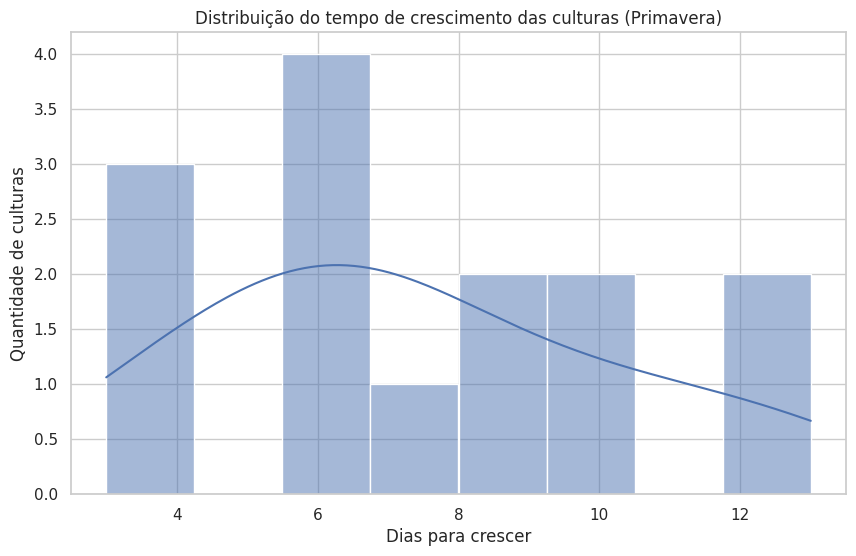

In [18]:
plt.figure()
sns.histplot(spring_price["days_to_grow"], bins=8, kde=True)
plt.title("Distribuição do tempo de crescimento das culturas (Primavera)")
plt.xlabel("Dias para crescer")
plt.ylabel("Quantidade de culturas")
plt.show()


Observa-se que a maioria das culturas da primavera apresenta tempo de crescimento concentrado entre aproximadamente 5 e 8 dias, com poucas culturas demandando períodos mais longos. Essa distribuição indica predominância de ciclos curtos, favorecendo estratégias de plantio com maior rotatividade ao longo da safra.

## 2.2 Relação entre custo da semente e preço de venda

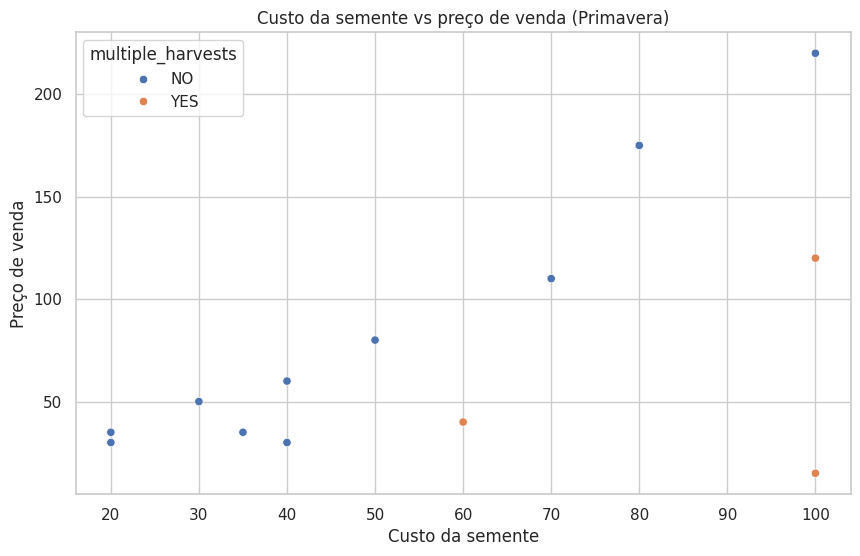

In [19]:
plt.figure()
sns.scatterplot(
    data=spring_price,
    x="seed_price",
    y="sell_price",
    hue="multiple_harvests"
)
plt.title("Custo da semente vs preço de venda (Primavera)")
plt.xlabel("Custo da semente")
plt.ylabel("Preço de venda")
plt.show()


## 2.3 Lucro simples por cultura (EDA orientada ao problema)

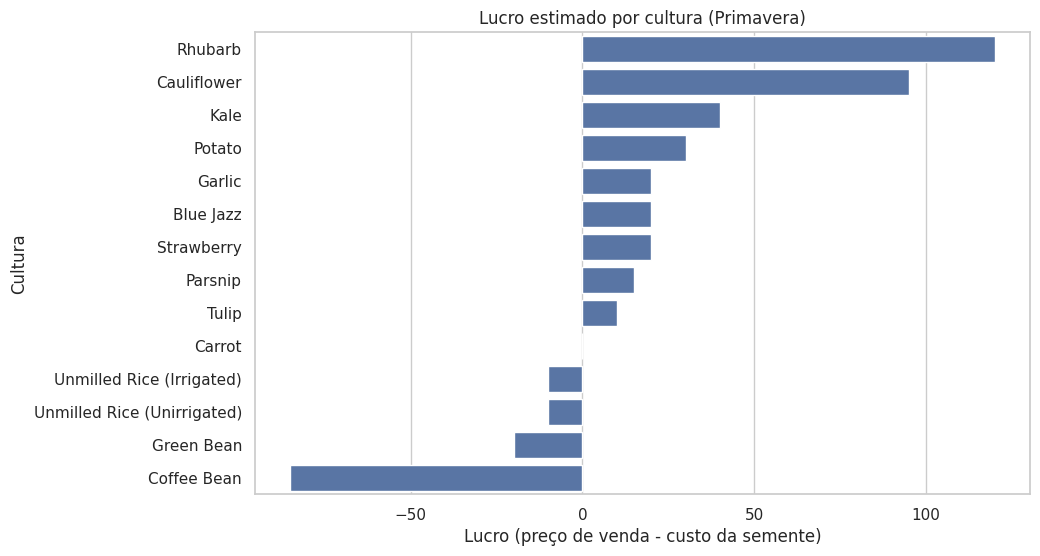

In [20]:
spring_price["profit"] = spring_price["sell_price"] - spring_price["seed_price"]

plt.figure()
sns.barplot(
    data=spring_price.sort_values("profit", ascending=False),
    x="profit",
    y="crop_name"
)
plt.title("Lucro estimado por cultura (Primavera)")
plt.xlabel("Lucro (preço de venda - custo da semente)")
plt.ylabel("Cultura")
plt.show()


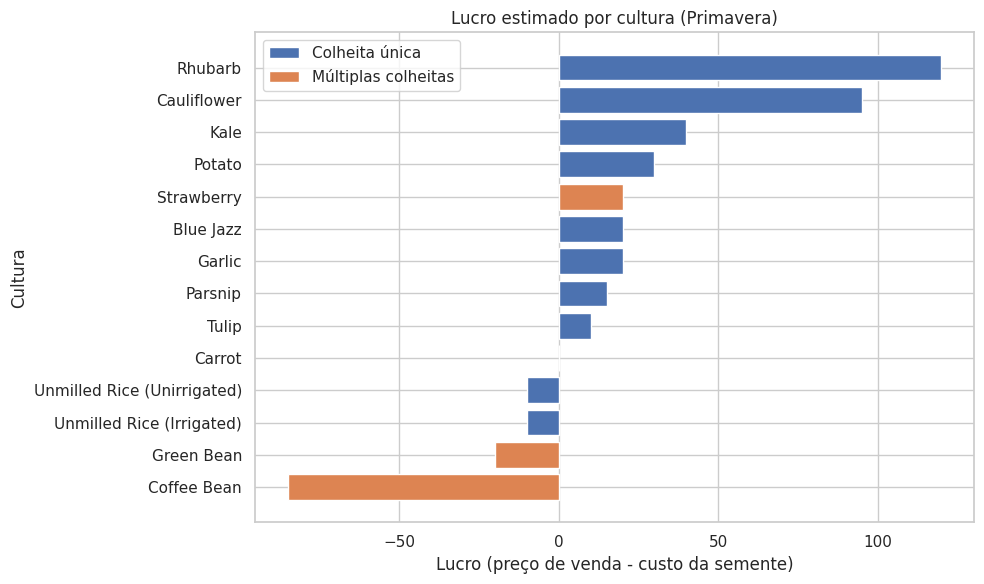

In [21]:
# Copiando dataset
df = spring_price.copy()

# Calculando lucro
df["profit"] = df["sell_price"] - df["seed_price"]

# Mantendo a MESMA ordenação usada antes
df = df.sort_values("profit")

# Definindo cores por tipo de colheita
colors = df["multiple_harvests"].map({
    "NO": "#4C72B0",   # azul — colheita única
    "YES": "#DD8452"   # laranja — múltiplas colheitas
})

# Plot
plt.figure(figsize=(10, 6))

plt.barh(
    df["crop_name"],
    df["profit"],
    color=colors
)

# Labels e título (iguais ao original)
plt.xlabel("Lucro (preço de venda - custo da semente)")
plt.ylabel("Cultura")
plt.title("Lucro estimado por cultura (Primavera)")

# Legenda manual (para não alterar o gráfico)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#4C72B0", label="Colheita única"),
    Patch(facecolor="#DD8452", label="Múltiplas colheitas")
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


## 3. Feature Engineering

### 3.1 Junção dos datasets:

In [22]:
# Dando merge em todas as nossas planilha no_price

no_price_files = {
    "spring": "/content/data/no_price/spring_crops_info.csv",
    "summer": "/content/data/no_price/summer_crops_info.csv",
    "fall": "/content/data/no_price/fall_crop_info.csv",
    "winter": "/content/data/no_price/winter_crop_info.csv"
}

dfs_no_price = []

for season, path in no_price_files.items():
    df = pd.read_csv(path)
    df["season"] = season
    dfs_no_price.append(df)

df_no_price_all = pd.concat(dfs_no_price, ignore_index=True)

df_no_price_all.head()


,crop_name,description,days_to_grow,multiple_harvests,season
0,Blue Jazz,The flower grows in a shere to nvite as may bu...,7,NO,spring
1,Cauliflower,"Valuable, but slow-growing. Despite its pale c...",12,NO,spring
2,Garlic,Adds a wonderful zestiness to dishes. High qua...,4,NO,spring
3,Kale,The waxy leaves are great in soups and stir frys.,6,NO,spring
4,Parsnip,A spring tuber closely related to the carrot. ...,4,NO,spring


In [23]:
# Mege em todas as oportunidades da planilha with_price:

with_price_files = {
    "spring": "/content/data/with_price/spring_crops_info.csv",
    "summer": "/content/data/with_price/summer_crops_info.csv",
    "fall": "/content/data/with_price/fall_crops_info.csv",
    "winter": "/content/data/with_price/winter_crops_info.csv"
}

dfs_with_price = []

for season, path in with_price_files.items():
    df = pd.read_csv(path)
    df["season"] = season
    dfs_with_price.append(df)

df_with_price_all = pd.concat(dfs_with_price, ignore_index=True)

df_with_price_all.head()


,crop_name,description,days_to_grow,regrowth,seed_price,sell_price,multiple_harvests,edible,season
0,Blue Jazz,The flower grows in a sphere to invite as many...,7,0,30,50,NO,NO,spring
1,Carrot,"A fast-growing, colorful tuber that makes for ...",3,0,35,35,NO,YES,spring
2,Cauliflower,"Valuable, but slow-growing. Despite its pale c...",12,0,80,175,NO,YES,spring
3,Coffee Bean,Plant in spring or summer to grow a coffee pla...,10,2,100,15,YES,NO,spring
4,Garlic,Adds a wonderful zestiness to dishes. High qua...,4,0,40,60,NO,YES,spring


In [24]:
# Padronização dos nomes das colunas:

def normalize_columns(df):
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df_no_price_all = normalize_columns(df_no_price_all)
df_with_price_all = normalize_columns(df_with_price_all)


In [25]:
# Verrificação das colçunas em comum:
common_columns = set(df_no_price_all.columns) & set(df_with_price_all.columns)
common_columns

{'crop_name', 'days_to_grow', 'description', 'multiple_harvests', 'season'}

In [26]:
# Merge final entre with_price e no_price:

merge_keys = ["crop_name", "season"]  # ajuste se necessário

df_full = pd.merge(
    df_no_price_all,
    df_with_price_all,
    on=merge_keys,
    how="inner",
    suffixes=("_no_price", "_with_price")
)

df_full.head()


,crop_name,description_no_price,days_to_grow_no_price,multiple_harvests_no_price,season,description_with_price,days_to_grow_with_price,regrowth,seed_price,sell_price,multiple_harvests_with_price,edible
0,Blue Jazz,The flower grows in a shere to nvite as may bu...,7,NO,spring,The flower grows in a sphere to invite as many...,7,0,30,50,NO,NO
1,Cauliflower,"Valuable, but slow-growing. Despite its pale c...",12,NO,spring,"Valuable, but slow-growing. Despite its pale c...",12,0,80,175,NO,YES
2,Garlic,Adds a wonderful zestiness to dishes. High qua...,4,NO,spring,Adds a wonderful zestiness to dishes. High qua...,4,0,40,60,NO,YES
3,Kale,The waxy leaves are great in soups and stir frys.,6,NO,spring,The waxy leaves are great in soups and stir fr...,6,0,70,110,NO,YES
4,Parsnip,A spring tuber closely related to the carrot. ...,4,NO,spring,A spring tuber closely related to the carrot. ...,4,0,20,35,NO,YES


In [27]:
# Check de sanidade:

print("No price:", df_no_price_all.shape)
print("With price:", df_with_price_all.shape)
print("Full dataset:", df_full.shape)


No price: (44, 5)
With price: (47, 9)
Full dataset: (43, 12)


In [35]:
# Descrição
if "description_no_price" in df_full.columns:
    df_full["description"] = df_full["description_no_price"]

# Days to grow
if "days_to_grow_no_price" in df_full.columns:
    df_full["days_to_grow"] = df_full["days_to_grow_no_price"]

# Multiple harvests (base agronômica)
if "multiple_harvests_no_price" in df_full.columns:
    df_full["multiple_harvests"] = df_full["multiple_harvests_no_price"].map({
        "YES": 1,
        "NO": 0
    })

# Remover colunas redundantes (só as que existirem)
cols_to_drop = [
    "description_no_price",
    "description_with_price",
    "days_to_grow_no_price",
    "days_to_grow_with_price",
    "multiple_harvests_no_price",
    "multiple_harvests_with_price"
]

df_full.drop(columns=[c for c in cols_to_drop if c in df_full.columns], inplace=True)


In [36]:
df_full.columns

Index(['crop_name', 'season', 'regrowth', 'seed_price', 'sell_price', 'edible',
       'season_duration_days', 'description', 'days_to_grow',
       'multiple_harvests'],
      dtype='object')

In [40]:
df_full

,crop_name,season,regrowth,seed_price,sell_price,edible,season_duration_days,description,days_to_grow,multiple_harvests
0,Blue Jazz,spring,0,30,50,NO,28,The flower grows in a shere to nvite as may bu...,7,0.00
1,Cauliflower,spring,0,80,175,YES,28,"Valuable, but slow-growing. Despite its pale c...",12,0.00
2,Garlic,spring,0,40,60,YES,28,Adds a wonderful zestiness to dishes. High qua...,4,0.00
3,Kale,spring,0,70,110,YES,28,The waxy leaves are great in soups and stir frys.,6,0.00
4,Parsnip,spring,0,20,35,YES,28,A spring tuber closely related to the carrot. ...,4,0.00
5,Potato,spring,0,50,80,YES,28,A widely cultivated tuber.,6,0.00
6,Rhubarb,spring,0,100,220,YES,28,"The stalks are extremely tart, but make a grea...",13,0.00
7,Tulip,spring,0,20,30,NO,28,The most popular spring flower. Has a very fai...,6,0.00
8,Unmilled Rice (Irrigated),spring,0,40,30,NO,28,Rice in its rawest form. Run this through a mi...,6,0.00
9,Unmilled Rice (Unirrigated),spring,0,40,30,NO,28,Rice in its rawest form. Run this through a mi...,8,0.00


### 3.2 Criando feats temporais para entender melhor o comportamento das culturas com múliplas colheitas:

In [37]:
# dias que cada estação dura:

df_full["season_duration_days"] = 28


In [41]:
# função para calcular numero de ciclos:

def calculate_cycles(row):
    if row["multiple_harvests"] == 1 and row["regrowth"] > 0:
        remaining_days = row["season_duration_days"] - row["days_to_grow"]
        if remaining_days > 0:
            return 1 + (remaining_days // row["regrowth"])
    return 1  # culturas de colheita única


In [42]:
df_full["harvest_cycles"] = df_full.apply(calculate_cycles, axis=1)

In [43]:
df_full["season_total_sell_price"] = (
    df_full["sell_price"] * df_full["harvest_cycles"]
)

In [46]:
df_full[
    [
        "crop_name",
        "season",
        "days_to_grow",
        "regrowth",
        "multiple_harvests",
        "harvest_cycles",
        "sell_price",
        "season_total_sell_price"
    ]
].head(10)


,crop_name,season,days_to_grow,regrowth,multiple_harvests,harvest_cycles,sell_price,season_total_sell_price
0,Blue Jazz,spring,7,0,0.00,1,50,50
1,Cauliflower,spring,12,0,0.00,1,175,175
2,Garlic,spring,4,0,0.00,1,60,60
3,Kale,spring,6,0,0.00,1,110,110
4,Parsnip,spring,4,0,0.00,1,35,35
5,Potato,spring,6,0,0.00,1,80,80
6,Rhubarb,spring,13,0,0.00,1,220,220
7,Tulip,spring,6,0,0.00,1,30,30
8,Unmilled Rice (Irrigated),spring,6,0,0.00,1,30,30
9,Unmilled Rice (Unirrigated),spring,8,0,0.00,1,30,30


### 3.2 Criando novas variáveis importantes:

In [47]:
def feature_engineering_df_full(df):
    df = df.copy()

    # Métricas econômicas

    # Lucro unitário
    df["profit"] = df["sell_price"] - df["seed_price"]

    # Indicador de lucratividade
    df["is_profitable"] = (df["profit"] > 0).astype(int)

    # Retorno sobre investimento (ROI)
    df["roi"] = df["profit"] / df["seed_price"]


    # Métricas temporais

    # Lucro por dia (eficiência temporal)
    df["profit_per_day"] = df["profit"] / df["days_to_grow"]

    # Indicador de rebrota
    df["has_regrowth"] = (df["regrowth"] > 0).astype(int)


    # Métricas de produção

    # Número de ciclos já calculado
    # (harvest_cycles já existe no df_full)

    # Valor total estimado por estação
    df["season_total_sell_price"] = (
        df["sell_price"] * df["harvest_cycles"]
    )

    # Variáveis categóricas

    # Já está binário (0 / 1)
    df["multiple_harvests_flag"] = df["multiple_harvests"].fillna(0).astype(int)

    # Comestível (YES / NO → 1 / 0)
    df["edible_flag"] = df["edible"].map({"YES": 1, "NO": 0})

    return df


In [48]:
df_full = feature_engineering_df_full(df_full)

In [49]:
df_full[
    [
        "crop_name",
        "season",
        "days_to_grow",
        "regrowth",
        "harvest_cycles",
        "sell_price",
        "profit",
        "profit_per_day",
        "roi",
        "season_total_sell_price",
        "multiple_harvests_flag",
        "edible_flag"
    ]
].head(10)


,crop_name,season,days_to_grow,regrowth,harvest_cycles,sell_price,profit,profit_per_day,roi,season_total_sell_price,multiple_harvests_flag,edible_flag
0,Blue Jazz,spring,7,0,1,50,20,2.86,0.67,50,0,0
1,Cauliflower,spring,12,0,1,175,95,7.92,1.19,175,0,1
2,Garlic,spring,4,0,1,60,20,5.00,0.50,60,0,1
3,Kale,spring,6,0,1,110,40,6.67,0.57,110,0,1
4,Parsnip,spring,4,0,1,35,15,3.75,0.75,35,0,1
5,Potato,spring,6,0,1,80,30,5.00,0.60,80,0,1
6,Rhubarb,spring,13,0,1,220,120,9.23,1.20,220,0,1
7,Tulip,spring,6,0,1,30,10,1.67,0.50,30,0,0
8,Unmilled Rice (Irrigated),spring,6,0,1,30,-10,-1.67,-0.25,30,0,0
9,Unmilled Rice (Unirrigated),spring,8,0,1,30,-10,-1.25,-0.25,30,0,0


## 4. Seleção de algoritmos de Machine Learning supervisionad


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [52]:
# Target principal (recomendado para decisão agrícola)
target = "season_total_sell_price"
# Alternativa: target = "sell_price"

# Remover colunas textuais/identificadoras
drop_cols = ["crop_name", "description", target] # cropname não entra no modelo!

X = df_full.drop(columns=[c for c in drop_cols if c in df_full.columns])
y = df_full[target].copy()

In [53]:
# Substituir inf/-inf por NaN e depois imputar com mediana
X = X.replace([np.inf, -np.inf], np.nan)

In [55]:
# Separar colunas numéricas e categóricas automaticamente
categorical_features = [c for c in X.columns if X[c].dtype == "object"]
numerical_features = [c for c in X.columns if c not in categorical_features]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), numerical_features),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ],
    remainder="drop"
)


### 4.1 Divisão de treino e teste:

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4.2 Dicionário de modelos candidatos:

In [57]:
models = {
    "LinearRegression": LinearRegression(),

    "RidgeRegression": Ridge(alpha=1.0),

    "LassoRegression": Lasso(alpha=0.01),

    "DecisionTree": DecisionTreeRegressor(
        max_depth=5,
        random_state=42
    ),

    "RandomForest": RandomForestRegressor(
        n_estimators=200,
        max_depth=6,
        random_state=42
    ),

    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),

    "SVR": SVR(kernel="rbf", C=100, gamma=0.1)
}


### 4.3 Treinar e avaliar todos os modelos:

In [60]:
results = []
trained_pipelines = {}

# Treinamento e avaliação

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    trained_pipelines[name] = pipe

    y_pred = pipe.predict(X_test)

    results.append({
        "Modelo": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

# Baseline (média)
y_pred_baseline = np.repeat(y_train.mean(), len(y_test))

baseline = {
    "Modelo": "Baseline (média)",
    "MAE": mean_absolute_error(y_test, y_pred_baseline),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_baseline)),
    "R2": r2_score(y_test, y_pred_baseline)
}

baseline_df = pd.DataFrame([baseline])

# Tabela final de comparação
final_results = (
    pd.concat([baseline_df, results_df], ignore_index=True)
      .sort_values("RMSE")
      .reset_index(drop=True)
)

final_results


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.740e+04, tolerance: 8.648e+02
  model = cd_fast.enet_coordinate_descent(


,Modelo,MAE,RMSE,R2
0,RidgeRegression,44.96,57.50,0.85
1,LassoRegression,55.88,75.01,0.75
2,LinearRegression,56.37,76.23,0.74
3,RandomForest,52.53,99.88,0.55
4,GradientBoosting,46.37,102.04,0.53
5,SVR,99.85,133.66,0.19
6,DecisionTree,98.59,151.46,-0.04
7,Baseline (média),160.90,182.08,-0.50


Os resultados indicam que o modelo Ridge Regression apresentou o melhor desempenho entre os algoritmos avaliados, com menor erro quadrático médio (RMSE = 57,50) e maior coeficiente de determinação (R² = 0,85). Esse desempenho superior sugere que a relação entre as variáveis explicativas e o valor econômico das culturas pode ser adequadamente modelada por uma abordagem linear regularizada, especialmente considerando o tamanho reduzido do conjunto de dados e a presença de variáveis correlacionadas. Modelos baseados em árvores apresentaram desempenho inferior, possivelmente devido à maior propensão ao overfitting nesse cenário.

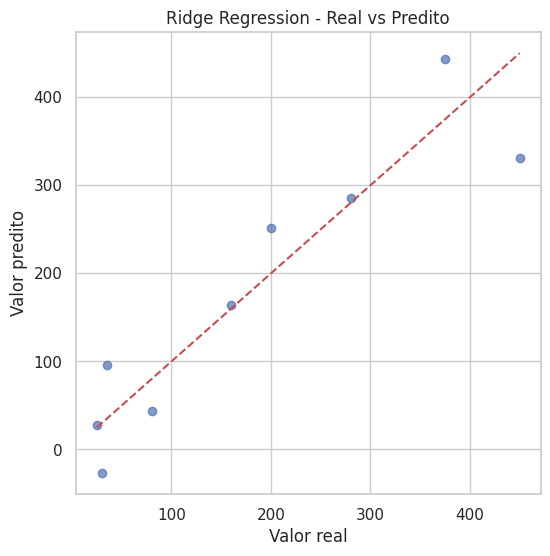

In [63]:
best_model = trained_pipelines["RidgeRegression"]

y_pred_ridge = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Ridge Regression - Real vs Predito")
plt.show()
